# Part A

In [1]:
import yfinance as yf
import mplfinance as mpf

In [2]:
# Store ticker name as variable for better readability and easier changes to a different stock if necessary
ticker = "IVV"

# Store beginning and end dates in variables for better readability and for easier manipulations of dates if necessary
beg_date = "2025-01-01"
end_date = "2025-01-31"

# Download the data for IVV into python
ivv_data = yf.download(ticker, start = beg_date, end = end_date)

# Set the order of the columns 
ivv_data = ivv_data[['Open', 'High', 'Low', 'Close', 'Volume']]

# Essentially removes "IVV" from being a secondary column header for each column
ivv_data.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

print(ivv_data)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Volume
Date                                                               
2025-01-02  592.169983  593.909973  583.330017  587.450012  9400400
2025-01-03  590.340027  595.429993  589.270020  594.609985  5867300
2025-01-06  599.150024  602.559998  596.429993  598.299988  4188000
2025-01-07  600.289978  600.570007  589.599976  591.570007  3810700
2025-01-08  591.489990  593.369995  587.979980  592.190002  5303600
2025-01-10  588.690002  588.690002  581.330017  583.330017  5881200
2025-01-13  578.510010  584.510010  578.000000  584.179993  3658800
2025-01-14  587.140015  587.739990  581.169983  584.989990  4063200
2025-01-15  593.179993  596.780029  584.989990  595.630005  5156300
2025-01-16  597.030029  597.200012  593.820007  594.619995  4562400
2025-01-17  599.760010  602.229980  598.510010  600.260010  4002700
2025-01-21  603.609985  605.960022  601.599976  605.700012  7109800
2025-01-22  608.900024  610.739990  608.359985  

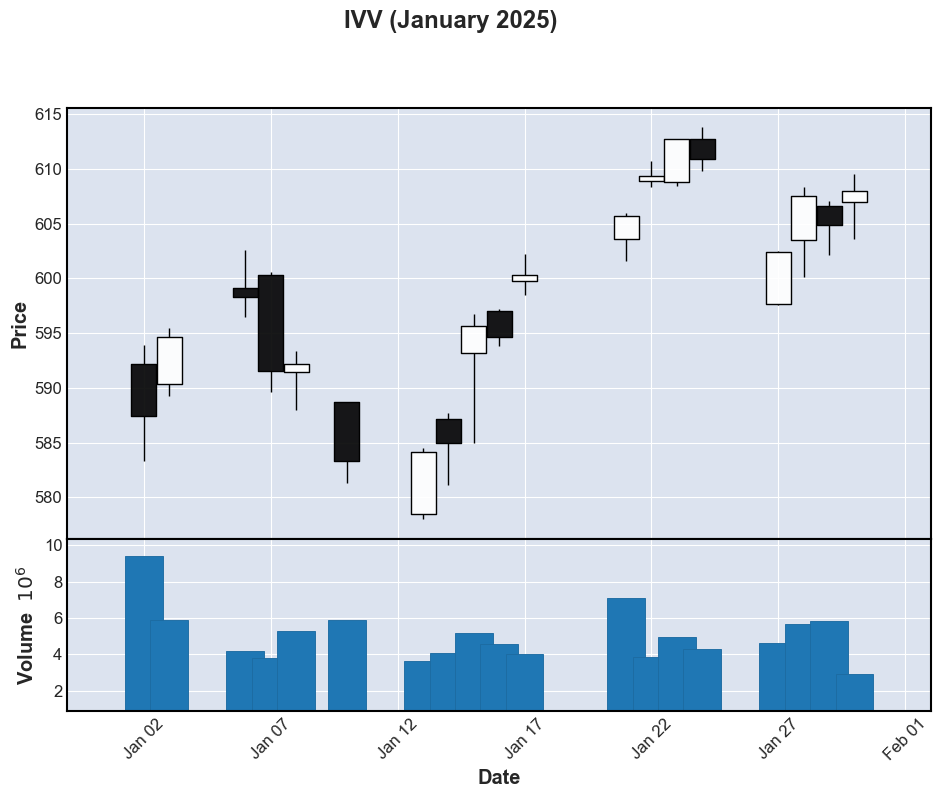

In [18]:
# Use mpf to plot the data in a candlestick chart, show the volume and show the nontrading days (weekends, some statutory holidays)
mpf.plot(
    ivv_data,
    type= "candle", 
    volume = True,
    figscale = 1.5,
    show_nontrading = True,
    xlabel = 'Date',
    title = 'IVV (January 2025)')

# Part B

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Adjust formatting to allow enough rows for the ouput and to allow for data to be shown without wrapping
pd.set_option("display.max_rows", 255)
pd.set_option('display.expand_frame_repr', False)

In [4]:
# Read in the csv into pandas
apple_data = r"C:\Users\arnis\Downloads\StockData(1).csv"
apple_data = pd.read_csv(apple_data)

# Include only the columns of 'trading day', 'AAPL', and only first 251 rows which shows all data for the first 250 full trading days
apple_data = apple_data[['Trading Day', 'AAPL']].head(251)

# New column that calculates the moving average as an average of the previous 20 days (not including current day) 
apple_data["Moving Average"] = apple_data['AAPL'].shift(1).rolling(window=20).mean()

# New column that calculates the population standard deviation using the previous 20 days (not including current day)
apple_data["Std Deviation"] = apple_data['AAPL'].shift(1).rolling(window=20).std(ddof=0)

# New column that calculates lower band
apple_data["Lower Band"] = apple_data["Moving Average"] - 2 * apple_data["Std Deviation"]

# New column that calculates upper band
apple_data["Upper Band"] = apple_data["Moving Average"] + 2 * apple_data["Std Deviation"]

# Set the index of the table to be based on trading day, not the automatic indexing that is done by pandas
apple_data.set_index('Trading Day', inplace=True)

# Print the table that we will be plotting
print(apple_data)

                   AAPL  Moving Average  Std Deviation  Lower Band  Upper Band
Trading Day                                                                   
1             72.362030             NaN            NaN         NaN         NaN
2             69.910980             NaN            NaN         NaN         NaN
3             71.020020             NaN            NaN         NaN         NaN
4             66.377579             NaN            NaN         NaN         NaN
5             66.338730             NaN            NaN         NaN         NaN
6             72.514923             NaN            NaN         NaN         NaN
7             70.211899             NaN            NaN         NaN         NaN
8             73.468636             NaN            NaN         NaN         NaN
9             71.085541             NaN            NaN         NaN         NaN
10            70.141518             NaN            NaN         NaN         NaN
11            64.593887             NaN            N

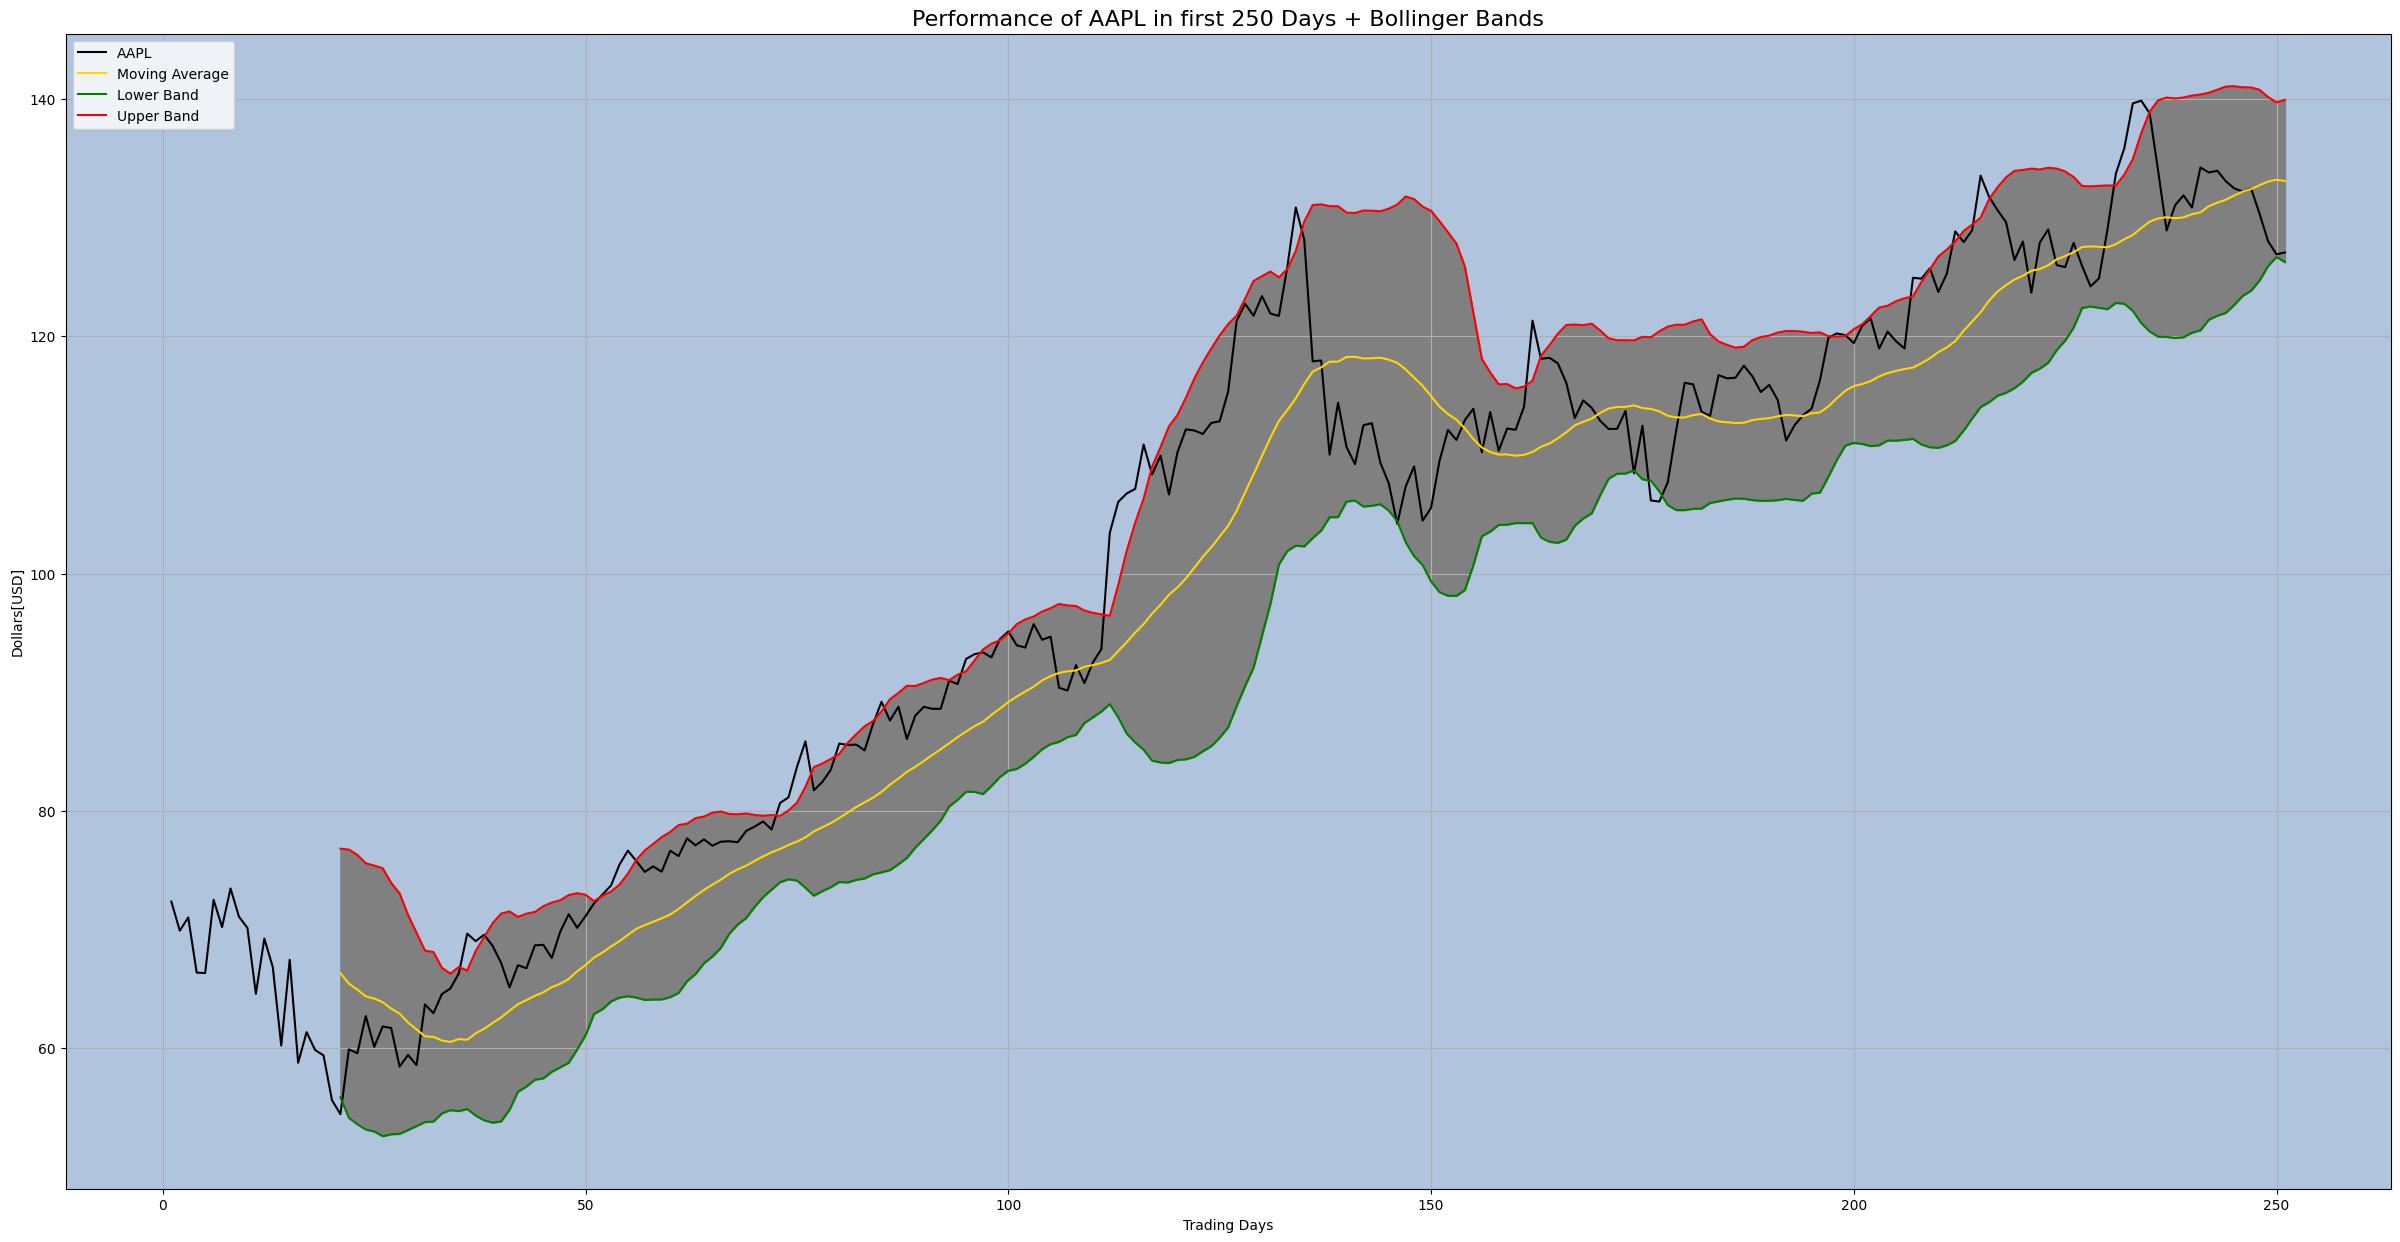

In [7]:
# Set up plotting area and set height and width
fig, ax = plt.subplots(figsize = (30,15))

# Plot AAPL stock price, moving average, lower band, and upper band + colour code each
ax.plot(apple_data['AAPL'], label = 'AAPL', color = 'black')
ax.plot(apple_data['Moving Average'], label = 'Moving Average', color = 'gold')
ax.plot(apple_data['Lower Band'], label = 'Lower Band', color = 'green')
ax.plot(apple_data['Upper Band'], label = 'Upper Band', color = 'red')

# Give a title and axis titles
ax.set_title('Performance of AAPL in first 250 Days + Bollinger Bands', fontsize = 16)
ax.set_xlabel('Trading Days')
ax.set_ylabel('Dollars[USD]')

# Fill the space between lower and upper band
ax.fill_between(apple_data.index, apple_data['Lower Band'], apple_data['Upper Band'], color = 'gray')

# Add a legend based on labels that were set previously
ax.legend()

# Set colour to match the example given in the assignment file
ax.set_facecolor('lightsteelblue')

# Add gridlines
plt.grid()

# Displays the plot
plt.show()